In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hitters.csv to Hitters.csv
Saving Advertising.csv to Advertising.csv
User uploaded file "Hitters.csv" with length 20906 bytes
User uploaded file "Advertising.csv" with length 4756 bytes


In [37]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [10]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [11]:
pls_model.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [18]:
y_pred = pls_model.predict(X_train)

In [19]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [23]:
r2_score(y_train, y_pred)

0.5140424486535481

In [25]:
y_pred = pls_model.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

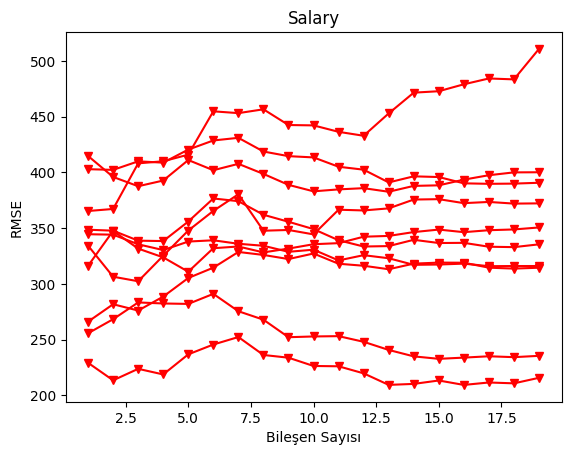

In [31]:
cv_10 = model_selection.KFold(n_splits= 10, shuffle= True, random_state = 1)

RMSE= []

for i in np.arange(1, X_train.shape[1] + 1):
  pls = PLSRegression(n_components=i)
  score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv = cv_10, scoring="neg_mean_squared_error" ))
  RMSE.append(score)


plt.plot(np.arange(1, X_train.shape[1]+1), np.array(RMSE), "-v", c="r")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Salary");

In [32]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)


In [33]:
y_pred = pls_model.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526